# Load Library

In [1]:
import pandas as pd
from pandas import Series,DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#from sklearn import linear_model
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import GaussianNB

# 載入訓練資料

In [2]:
df = pd.read_csv("train.csv")

print ('訓練資料集統計資訊')
#df.describe()

df.info()

#print ('----------------------------------')
#print ('該欄位有null值的比例')
#total = df.isnull().sum().sort_values(ascending=False)
#percent_1 = df.isnull().sum()/df.isnull().count()*100
#percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
#missing_data = pd.concat([total, percent_2], axis=1, keys=['筆數', '%'])
#missing_data.head(5)

訓練資料集統計資訊
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      

# 有Null值的比例

In [3]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['筆數', '%'])
missing_data.head(5)

,筆數,%
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3


### 過多遺失值：Alley/PoolQC/MiscFeature ( 處理方式：分析前drop column)

In [4]:
df = df.drop(['Alley','PoolQC','MiscFeature'], axis=1)

### 將dataset中type=object 且有遺失值的資訊進行資料補足的作業
須補足的遺失值欄位資訊：
MasVnrType/BsmtQual/BsmtCond/BsmtExposure/
BsmtFinType1/BsmtFinType2/Electrical/FireplaceQu/
GarageType/GarageFinish/GarageQual/GarageCond/Fence

### MasVnrType - 找出最多筆數的類型將其填入至遺失值中

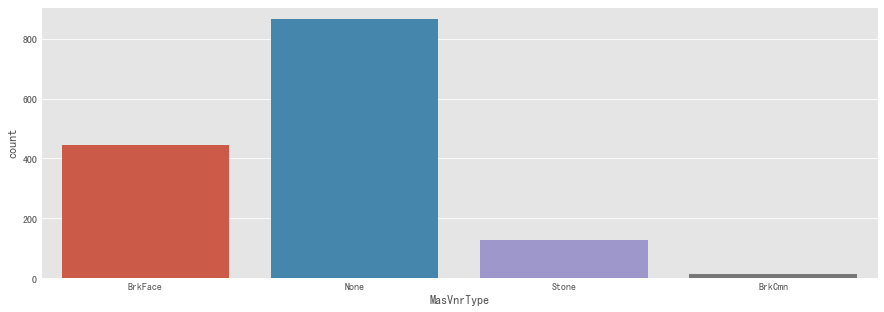

In [5]:
# 針對MasVnrType的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#MasVnrType筆數統計分析長條圖
sns.countplot(x='MasVnrType', data=df, ax=axis1)

### 結果：由上圖得知，MasVnrType 欄位中最多的資訊為None , 因此將此欄位有遺失值的部分補入None

In [6]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

### BsmtQual - 找出最多筆數的類型將其填入至遺失值中

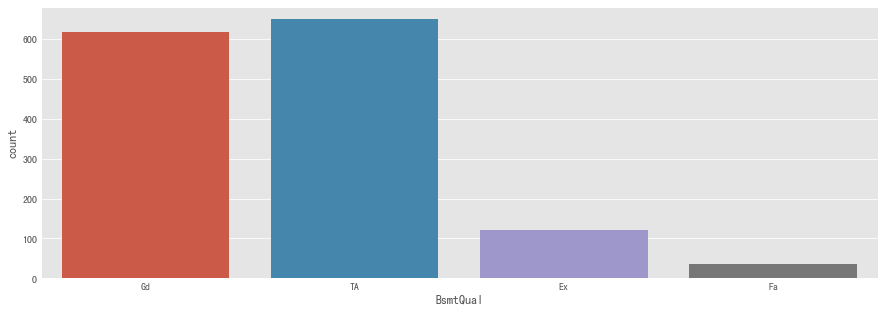

In [7]:
# 針對BsmtQual的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#BsmtQual筆數統計分析長條圖
sns.countplot(x='BsmtQual', data=df, ax=axis1)

### 結果：由上圖得知，BsmtQual 欄位中最多的資訊為TA , 因此將此欄位有遺失值的部分補入TA

In [8]:
df["BsmtQual"] = df["BsmtQual"].fillna("TA")

### BsmtCond - 找出最多筆數的類型將其填入至遺失值中

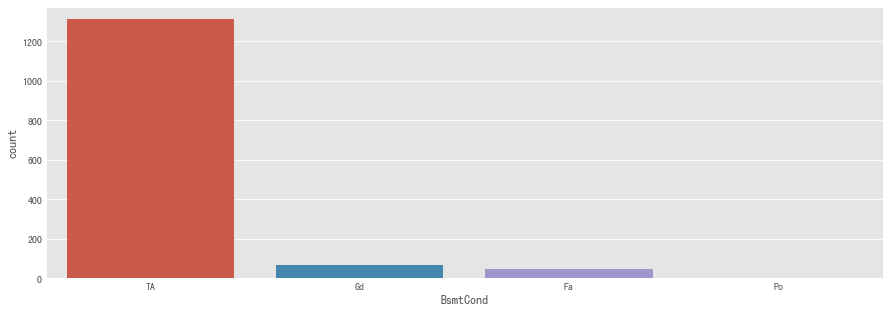

In [9]:
# 針對BsmtCond的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#BsmtCond筆數統計分析長條圖
sns.countplot(x='BsmtCond', data=df, ax=axis1)

### 結果：由上圖得知，BsmtCond 欄位中最多的資訊為TA , 因此將此欄位有遺失值的部分補入TA

In [10]:
df["BsmtCond"] = df["BsmtCond"].fillna("TA")

### BsmtExposure - 找出最多筆數的類型將其填入至遺失值中 

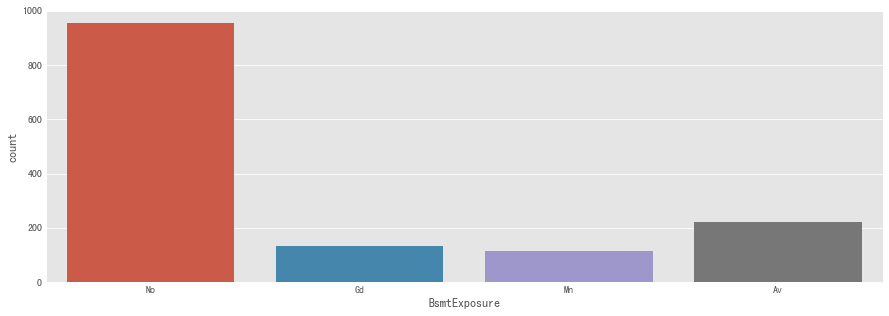

In [11]:
# 針對BsmtExposure 的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#BsmtExposure筆數統計分析長條圖
sns.countplot(x='BsmtExposure', data=df, ax=axis1)

### 結果：由上圖得知，BsmtExposure 欄位中最多的資訊為No , 因此將此欄位有遺失值的部分補入No

In [12]:
df["BsmtExposure"] = df["BsmtExposure"].fillna("No")

### BsmtFinType1 - 找出最多筆數的類型將其填入至遺失值中 

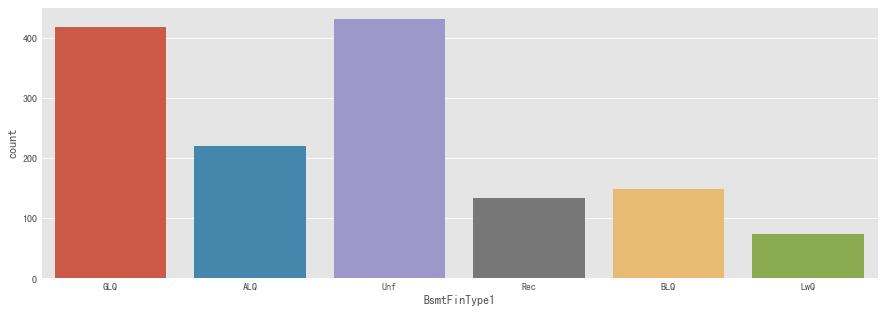

In [13]:
# 針對BsmtFinType1的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#BsmtFinType1筆數統計分析長條圖
sns.countplot(x='BsmtFinType1', data=df, ax=axis1)

### 結果：由上圖得知，BsmtFinType1 欄位中最多的資訊為Unf , 因此將此欄位有遺失值的部分補入Unf

In [14]:
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("Unf")

### BsmtFinType2 - 找出最多筆數的類型將其填入至遺失值中

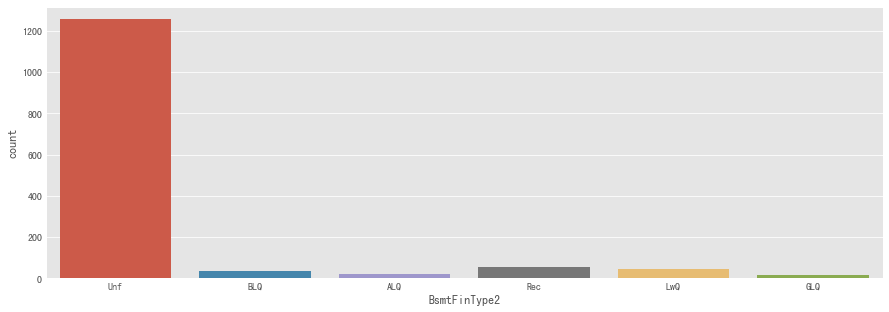

In [15]:
# 針對BsmtFinType2的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#BsmtFinType2筆數統計分析長條圖
sns.countplot(x='BsmtFinType2', data=df, ax=axis1)

### 結果：由上圖得知，BsmtFinType2 欄位中最多的資訊為Unf , 因此將此欄位有遺失值的部分補入Unf

In [16]:
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("Unf")

### Electrical - 找出最多筆數的類型將其填入至遺失值中

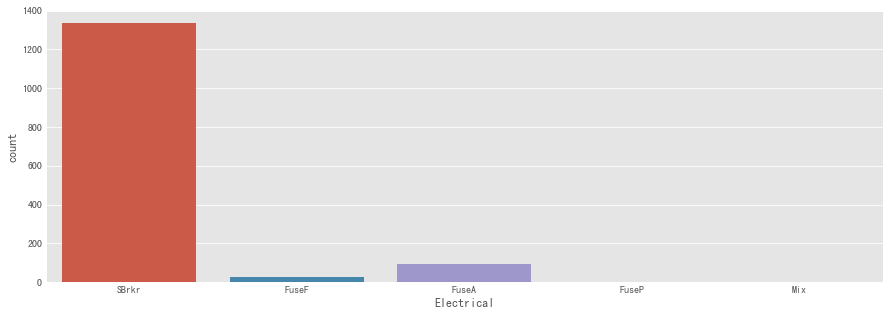

In [17]:
# 針對Electrical的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#Electrical筆數統計分析長條圖
sns.countplot(x='Electrical', data=df, ax=axis1)

### 結果：由上圖得知，Electrical 欄位中最多的資訊為SBrkr , 因此將此欄位有遺失值的部分補入SBrkr

In [18]:
df["Electrical"] = df["Electrical"].fillna("SBrkr")

### FireplaceQu - 找出最多筆數的類型將其填入至遺失值中

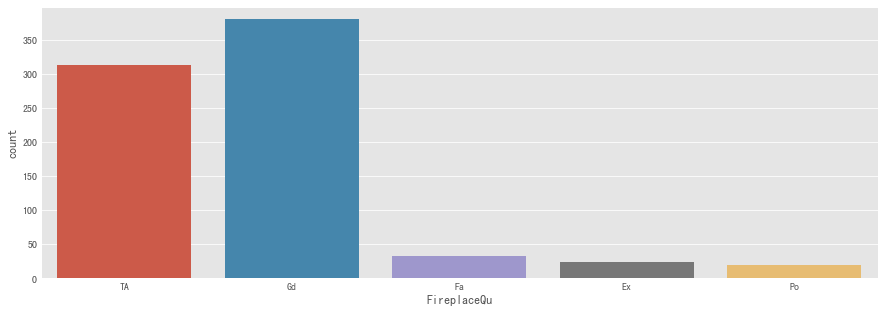

In [19]:
# 針對FireplaceQu的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#FireplaceQu筆數統計分析長條圖
sns.countplot(x='FireplaceQu', data=df, ax=axis1)

### 結果：由上圖得知，FireplaceQu 欄位中最多的資訊為Gd , 因此將此欄位有遺失值的部分補入Gd

In [20]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("Gd")

### GarageType - 找出最多筆數的類型將其填入至遺失值中

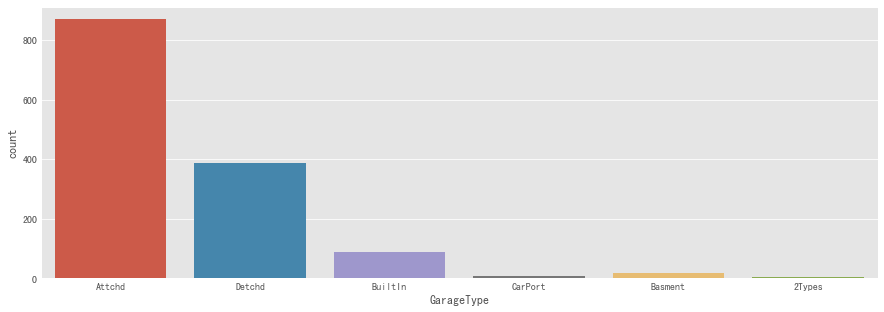

In [21]:
# 針對GarageType的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#GarageType筆數統計分析長條圖
sns.countplot(x='GarageType', data=df, ax=axis1)

### 結果：由上圖得知，GarageType 欄位中最多的資訊為Attchd , 因此將此欄位有遺失值的部分補入Attchd

In [22]:
df["GarageType"] = df["GarageType"].fillna("Attchd")

### GarageFinish - 找出最多筆數的類型將其填入至遺失值中

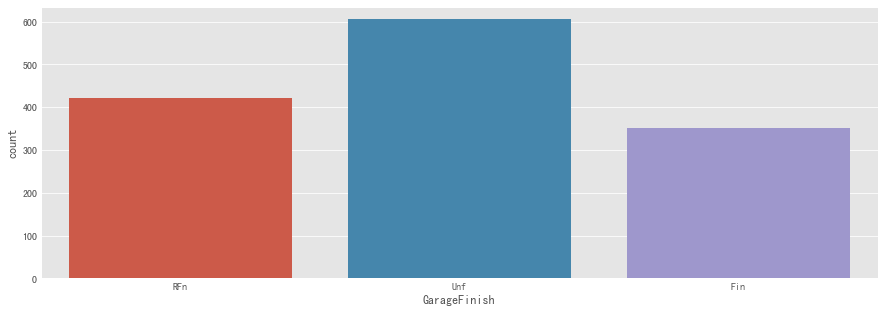

In [23]:
# 針對GarageFinish的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#GarageFinish筆數統計分析長條圖
sns.countplot(x='GarageFinish', data=df, ax=axis1)

### 結果：由上圖得知，GarageFinish 欄位中最多的資訊為Unf , 因此將此欄位有遺失值的部分補入Unf

In [24]:
df["GarageFinish"] = df["GarageFinish"].fillna("Unf")

### GarageQual - 找出最多筆數的類型將其填入至遺失值中

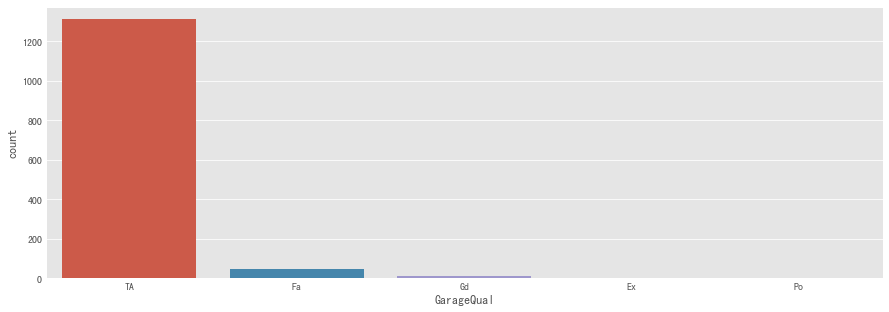

In [25]:
# 針對GarageQual的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#GarageQual筆數統計分析長條圖
sns.countplot(x='GarageQual', data=df, ax=axis1)

### 結果：由上圖得知，GarageQual 欄位中最多的資訊為TA , 因此將此欄位有遺失值的部分補入TA

In [26]:
df["GarageQual"] = df["GarageQual"].fillna("TA")

### GarageCond - 找出最多筆數的類型將其填入至遺失值中

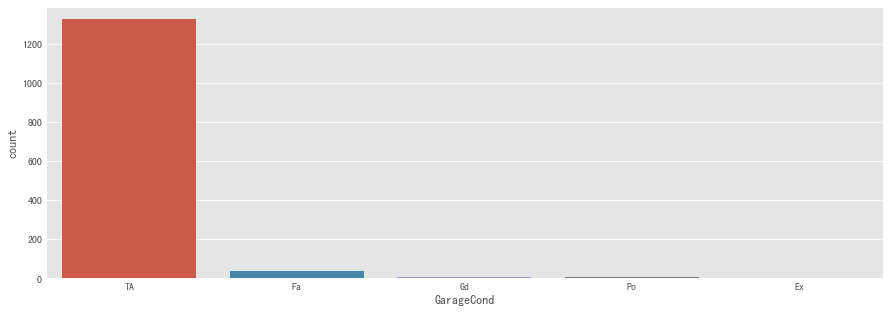

In [27]:
# 針對GarageCond的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#GarageCond筆數統計分析長條圖
sns.countplot(x='GarageCond', data=df, ax=axis1)

### 結果：由上圖得知，GarageCond 欄位中最多的資訊為TA , 因此將此欄位有遺失值的部分補入TA

In [28]:
df["GarageCond"] = df["GarageCond"].fillna("TA")

### Fence - 找出最多筆數的類型將其填入至遺失值中

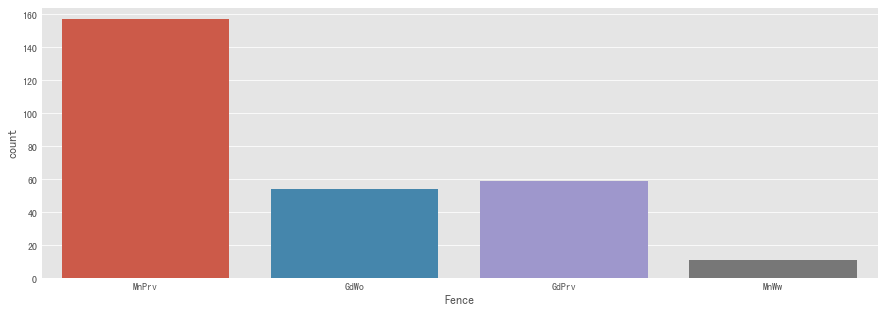

In [29]:
# 針對Fence的狀況進行分析-數量統計
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

#Fence筆數統計分析長條圖
sns.countplot(x='Fence', data=df, ax=axis1)

### 結果：由上圖得知，Fence 欄位中最多的資訊為MnPrv , 因此將此欄位有遺失值的部分補入MnPrv

In [30]:
df["Fence"] = df["Fence"].fillna("MnPrv")

### 資料處理 - 針對Dataset中type為float64的欄位進行轉換為int的作業
需轉換的欄位有：LotFrontage/MasVnrArea/GarageYrBlt

In [31]:
#LotFrontage欄位：補入遺失值 且 補入的值需轉換為int
LotFrontage = df[['LotFrontage']].fillna(np.mean(df[['LotFrontage']])).astype(int)

#將LotFrontage轉換完畢的資訊與df資料集進行合併,並產生新的資料集為df_ml01
df_ml01 = pd.merge(df, LotFrontage,left_index=True, right_index=True)

#將因資料轉換後原本舊的欄位drop掉（LotFrontage系統會自動轉成LotFrontage_x)
df_ml01 = df_ml01.drop(['LotFrontage_x'], axis=1)

In [32]:
#MasVnrArea欄位：補入遺失值 且 補入的值需轉換為int
MasVnrArea = df_ml01[['MasVnrArea']].fillna(np.mean(df_ml01[['MasVnrArea']])).astype(int)

#將MasVnrArea轉換完畢的資訊與df_ml01資料集進行合併,並產生新的資料集為df_ml02
df_ml02 = pd.merge(df_ml01, MasVnrArea,left_index=True, right_index=True)

#將因資料轉換後原本舊的欄位drop掉（MasVnrArea系統會自動轉成MasVnrArea_x)
df_ml02 = df_ml02.drop(['MasVnrArea_x'], axis=1)

In [33]:
#GarageYrBlt欄位：補入遺失值 且 補入的值需轉換為int
GarageYrBlt = df_ml02[['GarageYrBlt']].fillna(np.mean(df_ml02[['GarageYrBlt']])).astype(int)

#將GarageYrBlt轉換完畢的資訊與df_ml02資料集進行合併,並產生新的資料集為df_ml
df_ml = pd.merge(df_ml02, GarageYrBlt,left_index=True, right_index=True)

#將因資料轉換後原本舊的欄位drop掉（GarageYrBlt系統會自動轉成GarageYrBlt_x)
df_ml = df_ml.drop(['GarageYrBlt_x'], axis=1)

# 確認所有欄位均無遺失值且datatype = float64 均轉換完畢

In [34]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-

# 有Null值的比例 - 須確認完全沒有Null

In [35]:
total = df_ml.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df_ml.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['筆數', '%'])
missing_data.head(5)

,筆數,%
1stFlrSF,0.0,0.0
2ndFlrSF,0.0,0.0
3SsnPorch,0.0,0.0
BedroomAbvGr,0.0,0.0
BldgType,0.0,0.0


In [36]:
#df = pd.read_csv("train.csv")

#df = df.drop(['Alley','PoolQC','MiscFeature'], axis=1)
#df["MasVnrType"] = df["MasVnrType"].fillna("None")
#df["BsmtQual"] = df["BsmtQual"].fillna("TA")
#df["BsmtCond"] = df["BsmtCond"].fillna("TA")
#df["BsmtExposure"] = df["BsmtExposure"].fillna("No")
#df["BsmtFinType1"] = df["BsmtFinType1"].fillna("Unf")
#df["BsmtFinType2"] = df["BsmtFinType2"].fillna("Unf")
#df["Electrical"] = df["Electrical"].fillna("SBrkr")
#df["FireplaceQu"] = df["FireplaceQu"].fillna("Gd")
#df["GarageType"] = df["GarageType"].fillna("Attchd")
#df["GarageFinish"] = df["GarageFinish"].fillna("Unf")
#df["GarageQual"] = df["GarageQual"].fillna("TA")
#df["GarageCond"] = df["GarageCond"].fillna("TA")
#df["Fence"] = df["Fence"].fillna("MnPrv")

#LotFrontage欄位：補入遺失值 且 補入的值需轉換為int
#LotFrontage = df[['LotFrontage']].fillna(np.mean(df[['LotFrontage']])).astype(int)

#df_ml01 = pd.merge(df, LotFrontage,left_index=True, right_index=True)
#df_ml01 = pd.merge(df, LotFrontage , MasVnrArea ,left_index=True, right_index=True)



#df_ml01 = df_ml01.drop(['LotFrontage_x'], axis=1)

#MasVnrArea = df_ml01[['MasVnrArea']].fillna(np.mean(df_ml01[['MasVnrArea']])).astype(int)
#df_ml02 = pd.merge(df_ml01, MasVnrArea,left_index=True, right_index=True)
#df_ml02 = df_ml02.drop(['MasVnrArea_x'], axis=1)


#GarageYrBlt = df_ml02[['GarageYrBlt']].fillna(np.mean(df_ml02[['GarageYrBlt']])).astype(int)
#df_ml = pd.merge(df_ml02, GarageYrBlt,left_index=True, right_index=True)
#df_ml = df_ml.drop(['GarageYrBlt_x'], axis=1)


#print ('---------確認所有欄位---------')
#df_ml.info()


#print ('---------------------------------------------')
#print ('該欄位有null值的比例')
#total = df_ml.isnull().sum().sort_values(ascending=False)
#percent_1 = df.isnull().sum()/df_ml.isnull().count()*100
#percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
#missing_data = pd.concat([total, percent_2], axis=1, keys=['筆數', '%'])
#missing_data.head(5)

In [37]:
df_ml.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_y,MasVnrArea_y,GarageYrBlt_y
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,70.041096,103.681507,1978.478082
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,22.024031,180.569120,23.994863
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,21.000000,0.000000,1900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,60.000000,0.000000,1962.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,70.000000,0.000000,1978.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,79.000000,164.250000,2001.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,313.000000,1600.000000,2010.000000


In [38]:
df_ml.shape

(1460, 78)

# 開始尋找feature

## 相關性分析

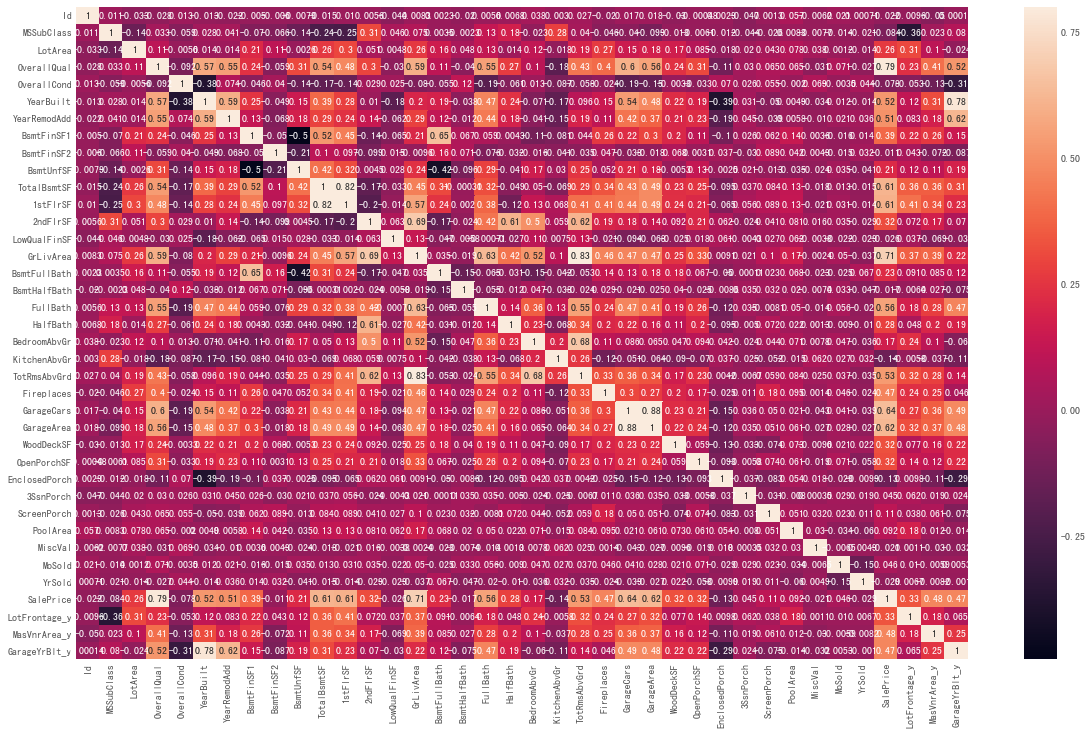

In [39]:
corrmat = df_ml.corr()
plt.subplots(figsize=(20,12))
sns.heatmap(corrmat, vmax=.8, annot=True);
#sns.heatmap(corrmat, vmax=0.9, square=True)


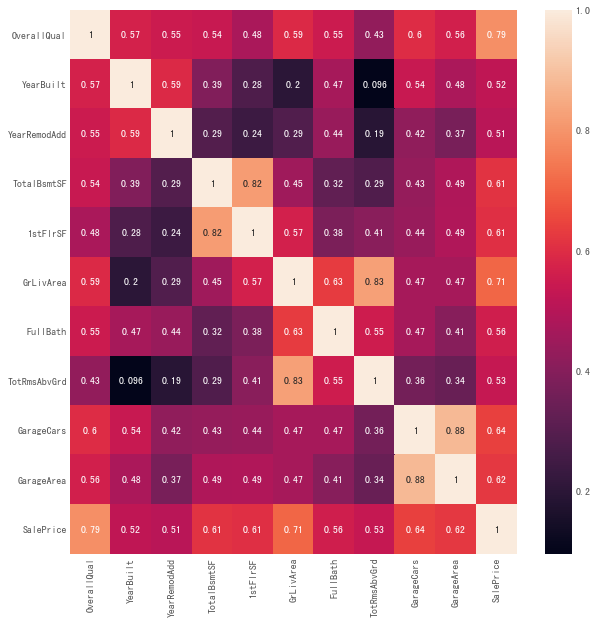

In [40]:
# most correlated features
corrmat = df_ml.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_ml[top_corr_features].corr(),annot=True)

### 依據hitmap顯示結果先使用以下feature進行進一步的分析
OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,YearRemodAdd,YearBuilt,TotRmsAbvGrd

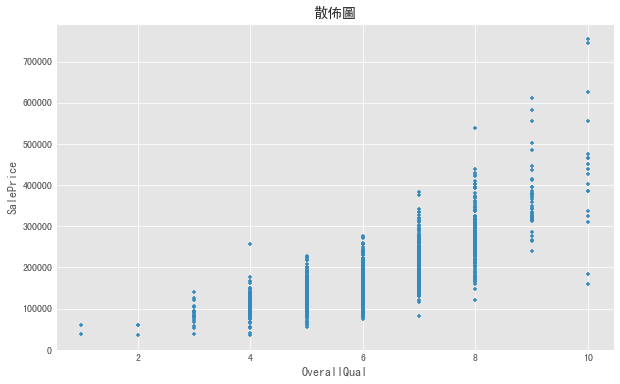

In [41]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='OverallQual',y='SalePrice',marker='+')

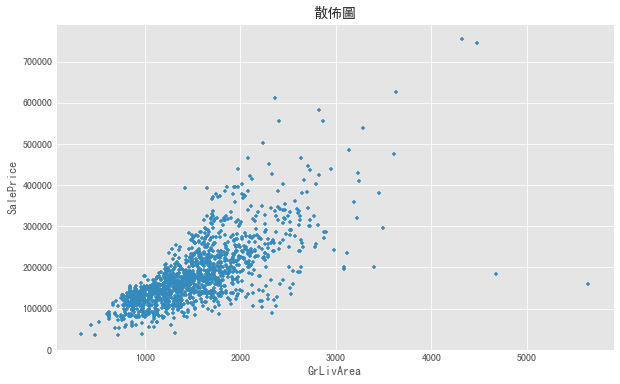

In [42]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='GrLivArea',y='SalePrice',marker='+')

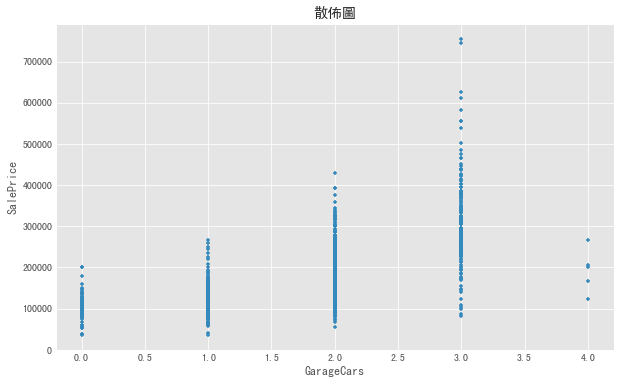

In [43]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='GarageCars',y='SalePrice',marker='+')

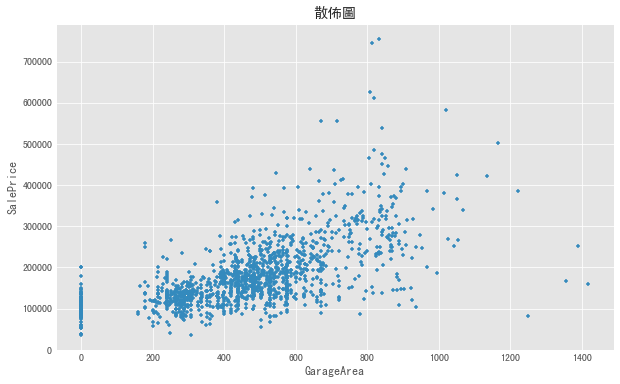

In [44]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='GarageArea',y='SalePrice',marker='+')

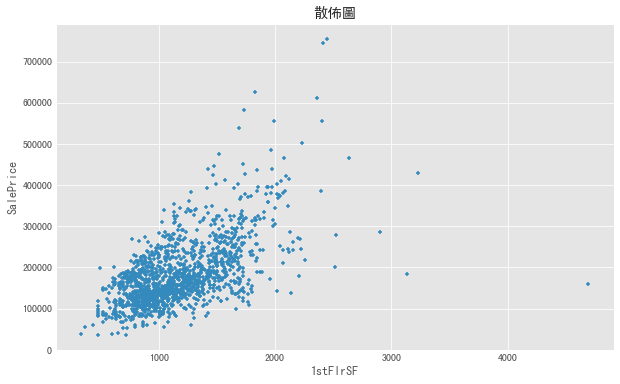

In [45]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='1stFlrSF',y='SalePrice',marker='+')

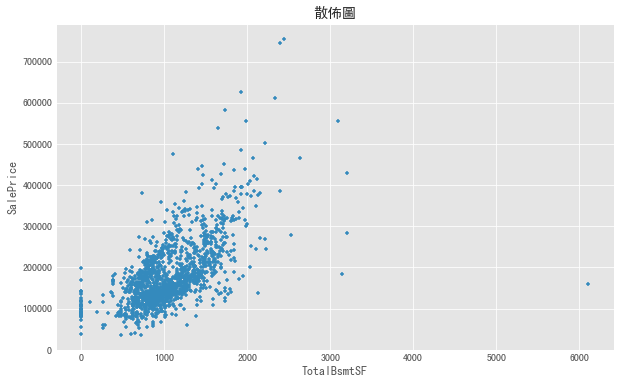

In [46]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='TotalBsmtSF',y='SalePrice',marker='+')

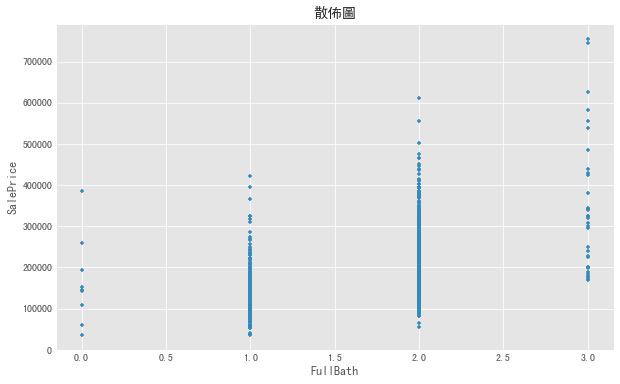

In [47]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='FullBath',y='SalePrice',marker='+')

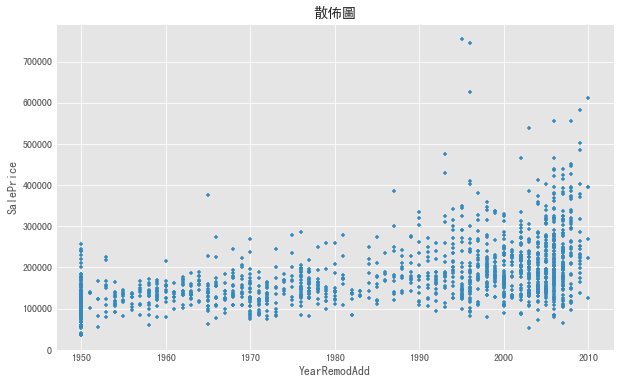

In [48]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='YearRemodAdd',y='SalePrice',marker='+')

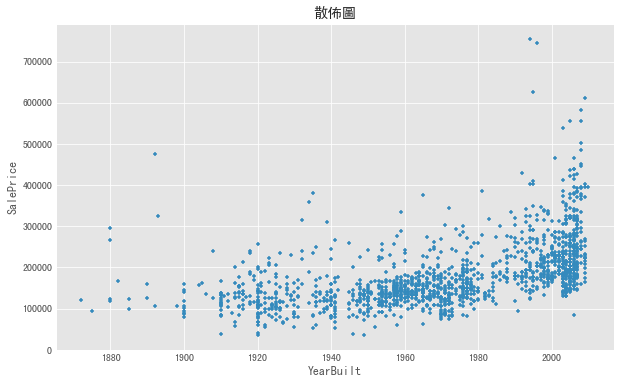

In [49]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='YearBuilt',y='SalePrice',marker='+')

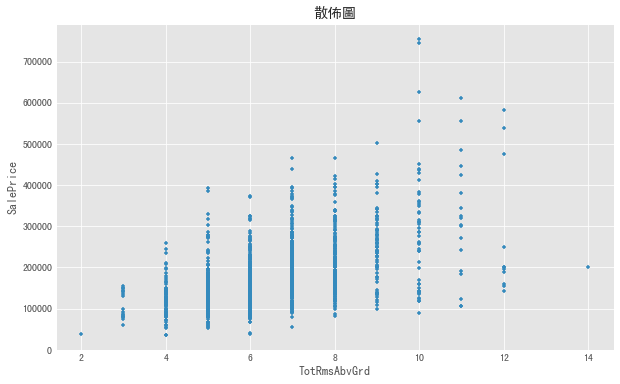

In [50]:
df_ml.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='TotRmsAbvGrd',y='SalePrice',marker='+')

### 分析結果：feature可考慮使用
#### OverallQual , GrLivArea , GarageCars , GarageArea , 1stFlrSF , TotalBsmtSF , FullBath , YearRemodAdd , TotRmsAbvGrd

### 分析date type 非 object型態的分佈狀況（長條圖顯示）

In [51]:
#fig=plt.figure(figsize=(500,100))
#df_ml.hist( figsize=[30,20])
#plt.show()

In [52]:
#df_ml.sample(5)

In [53]:
from sklearn.model_selection import train_test_split


#OverallQual , GrLivArea , GarageCars , GarageArea , 1stFlrSF , TotalBsmtSF , FullBath , YearRemodAdd
#X = df_ml[['OverallQual','GrLivArea','GarageCars','GarageArea','1stFlrSF', 'TotalBsmtSF','FullBath','YearRemodAdd']]

X = df_ml[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','1stFlrSF', 'FullBath','YearRemodAdd','TotRmsAbvGrd']]
#X = df_ml[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','1stFlrSF', 'FullBath']]
#X_train = df_ml[['Pclass','Age','Sex_rank','SibSp','Parch']]

#OverallQual , GrLivArea , GarageCars , GarageArea , 1stFlrSF , TotalBsmtSF , FullBath , YearRemodAdd
#numeric = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath','YearRemodAdd']
y = df_ml['SalePrice']
#X_test = df_test_ml[['Pclass','Age','Sex_rank','SibSp','Parch']]
#X_test = df_test_ml[['OverallQual','GrLivArea','TotRmsAbvGrd','Embarked_rank','SibSp']]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## 標準化

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#X_std = sc.transform(X)

# 使用整體學習進行預測

## Bagging

In [56]:
#from sklearn.ensemble import BaggingClassifier

bagc = BaggingClassifier(n_estimators=100)

bagc.fit(X_train, y_train)

Y_test = bagc.predict(X_test)

bagc.score(X_train, y_train)

0.98825831702544031

## 隨機森林(Random Forest)

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

Y_test = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

0.98825831702544031